This is exactly similar to the methods followed in Experiment-0. But in this experiment, I increased the number of samples or data points for all the classes that had low frequency in the complete Dataset based on a rule. If we observe the bar plots in Experiment-0 and here the difference in the frequency of each class in the complete dataset can be seen.

In [ ]:
# Importing Required Modules 
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Set the random seeds.
seedVal = 41
random.seed(seedVal)
np.random.seed(seedVal)

In [ ]:
!git clone https://github.com/Revanth980727/Computational-Physics-PHYS-5070.git

Cloning into 'Computational-Physics-PHYS-5070'...
remote: Enumerating objects: 7543, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 7543 (delta 13), reused 40 (delta 11), pack-reused 7499
Receiving objects: 100% (7543/7543), 96.07 MiB | 30.47 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
file_names = list()
true_label = list()
with open("/content/Computational-Physics-PHYS-5070/labels-map-proj-v3.txt",'r') as data_file:
    for line in data_file:
        data = line.split()
        file_names.append(data[0])
        true_label.append(data[1])
print(len(file_names))

73031


Depending on the actual frequency of images in each class, the images are reused a couple of times to increase the frequencies to at least 1000.

In [ ]:
from pathlib import Path
dataset = list()
labels = list()
for i in range(0,len(file_names)):
    my_file = Path('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+file_names[i])
    #print(my_file)
    if my_file.is_file():
        img = cv2.imread('/content/Computational-Physics-PHYS-5070/map-proj-v3/'+ file_names[i],0)
        if int(true_label[i]) == 1:
          for k in range(2):
            dataset.append(img)
            labels.append(int(true_label[i]))
        elif int(true_label[i]) == 2 or int(true_label[i]) == 6:
          for k in range(10):
            dataset.append(img)
            labels.append(int(true_label[i]))
        elif int(true_label[i]) == 3 or int(true_label[i]) == 4:
          for k in range(5):
            dataset.append(img)
            labels.append(int(true_label[i]))
        elif int(true_label[i]) == 5:
          for k in range(50):
            dataset.append(img)
            labels.append(int(true_label[i]))
        elif int(true_label[i]) == 0:
          dataset.append(img)
          labels.append(int(true_label[i]))
        elif int(true_label[i]) == 7:
          for k in range(20):
            dataset.append(img)
            labels.append(int(true_label[i]))
#print(counter)
print(len(dataset))
print(len(labels))

13867
13867


In [ ]:
train_x = dataset[0:11000]
print(len(train_x))
train_x = np.array(train_x)

train_y = labels[0:11000]
print(len(train_y))
train_y = np.array(train_y)

test_x = dataset[11000:]
print(len(test_x))
test_x = np.array(test_x)

test_y = labels[11000:]
test_set = test_x
print(len(test_y))
test_y = np.array(test_y)

11000
11000
2867
2867


In [ ]:
dataset = np.array(dataset)
labels = np.array(labels)

In [ ]:
import pandas as pd
df = pd.read_csv (r'/content/Computational-Physics-PHYS-5070/landmarks_map-proj-v3_classmap.csv',header = None, names = ['Label','Class'])
#print(df)
#print(df['Class'])
df.head()

,Label,Class
0,0,other
1,1,crater
2,2,dark dune
3,3,slope streak
4,4,bright dune


In [ ]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2, y[i], ha = 'center')

Look at the bar plots below the frequencies of every class has increased.

Note: The frequency of "other" class was left intact, because the frequency is already high.

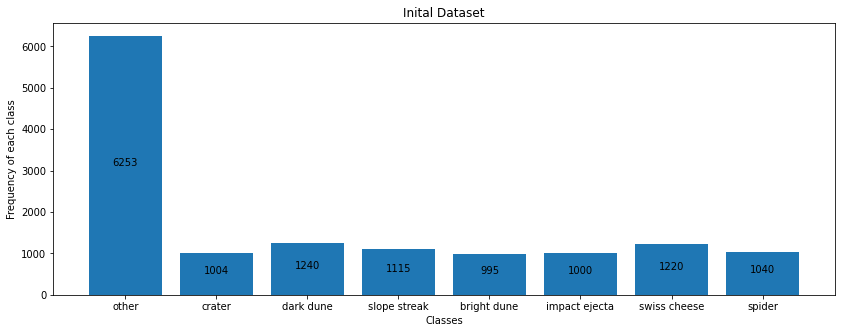

In [ ]:
label_0 = len(labels[labels == 0])
label_1 = len(labels[labels == 1])
label_2 = len(labels[labels == 2])
label_3 = len(labels[labels == 3])
label_4 = len(labels[labels == 4])
label_5 = len(labels[labels == 5])
label_6 = len(labels[labels == 6])
label_7 = len(labels[labels == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Inital Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7)

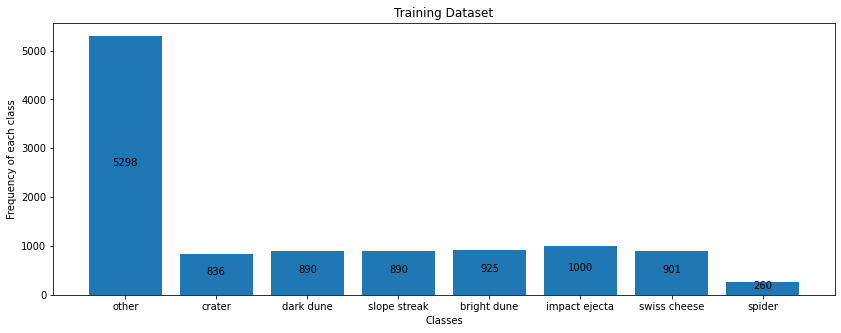

In [ ]:
label_0 = len(train_y[train_y == 0])
label_1 = len(train_y[train_y == 1])
label_2 = len(train_y[train_y == 2])
label_3 = len(train_y[train_y == 3])
label_4 = len(train_y[train_y == 4])
label_5 = len(train_y[train_y == 5])
label_6 = len(train_y[train_y == 6])
label_7 = len(train_y[train_y == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4)

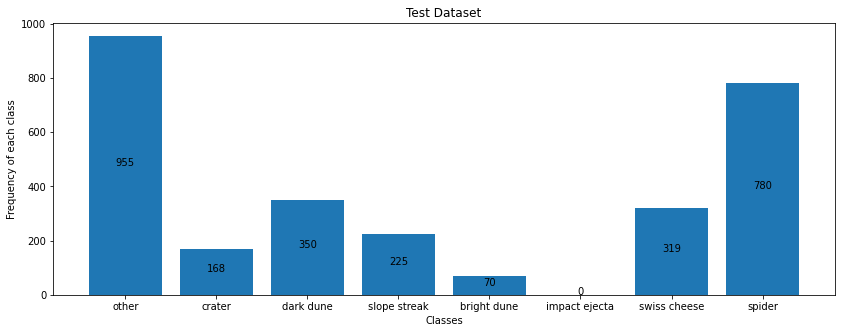

In [ ]:
label_0 = len(test_y[test_y == 0])
label_1 = len(test_y[test_y == 1])
label_2 = len(test_y[test_y == 2])
label_3 = len(test_y[test_y == 3])
label_4 = len(test_y[test_y == 4])
label_5 = len(test_y[test_y == 5])
label_6 = len(test_y[test_y == 6])
label_7 = len(test_y[test_y == 7])
plt.figure(figsize=(14,5))
plt.bar(df['Class'], [label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
addlabels(df['Class'],[label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7])
plt.title('Test Dataset')
plt.xlabel('Classes')
plt.ylabel('Frequency of each class')
plt.show()

#print(label_0,label_1,label_2,label_3,label_4)

In [ ]:
import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Define some constants.
NUM_CLASSES = 8
BATCH_SIZE = 16

In [ ]:
# Normalizing the dataset
train_x = keras.utils.all_utils.normalize(train_x, axis=1)
test_x = keras.utils.all_utils.normalize(test_x, axis=1)

# Class vectors are converted to binary class matrices
train_y = keras.utils.all_utils.to_categorical(train_y, NUM_CLASSES)
test_y =keras.utils.all_utils.to_categorical(test_y, NUM_CLASSES)

K.set_image_data_format('channels_first')

# Data reshape
train_x = train_x.reshape(train_x.shape[0], 1, 227, 227)
test_x =  test_x.reshape(test_x.shape[0], 1, 227, 227)

It was observed that the training accuracy comparitively increased here. It is around 97.48%.

In [ ]:
# Training a CNN-based model using the NASA Dataset
nasa_model = Sequential()

# Define the intermediate layers.
nasa_model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(1,227,227)))
nasa_model.add(Conv2D(64,(3,3), activation='relu'))
nasa_model.add(MaxPooling2D(pool_size=(2,2)))
nasa_model.add(Dropout(0.25))
nasa_model.add(Flatten())
nasa_model.add(Dense(128,activation='relu'))
nasa_model.add(Dropout(0.5))

nasa_model.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
nasa_model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
#nasa_model = KerasClassifier(model=nasa_model, clip_values=(0,1))


# Fit the model
nasa_model.fit(train_x, train_y, epochs=18, batch_size=BATCH_SIZE)

Train on 11000 samples
Epoch 1/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 1.5001 - accuracy: 0.5310
Epoch 2/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.8732 - accuracy: 0.6960
Epoch 3/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.5517 - accuracy: 0.7958
Epoch 4/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.3905 - accuracy: 0.8575
Epoch 5/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.3094 - accuracy: 0.8873
Epoch 6/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.2603 - accuracy: 0.9039
Epoch 7/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.2061 - accuracy: 0.9272
Epoch 8/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.1931 - accuracy: 0.9337
Epoch 9/18
11000/11000 [==============================] - 195s 18ms/sample - loss: 0.1543 - accuracy: 0.9

The testing accuracy was observed to be low, around 36.93%. This is a case of overfitting. When a statistical model matches its training data perfectly, this is known as a perfect fit. When this occurs, the algorithm is unable to execute accurately against unknown data, negating the method's objective. Thus, the training accuracy is high but not the test accuracy. This method should be discarded.

In [ ]:
# Testing model on test dataset
predictions = nasa_model.predict(test_x)
count = 0
freq = dict()
incorrect = dict()
survey = dict()
for i in range(test_x.shape[0]):
  if np.where(predictions[i] == max(predictions[i]))[0][0] == np.where(test_y[i] == max(test_y[i]))[0][0]:
    class_type = np.where(predictions[i] == max(predictions[i]))[0][0]
    if class_type not in freq:
      freq[class_type] = i
      survey[class_type] = 1
    survey[class_type] += 1
    count+=1
  else:
    class_type = np.where(test_y[i] == max(test_y[i]))[0][0]
    if class_type not in incorrect:
      incorrect[class_type] = i
      survey[class_type] = 0
accuracy = count/test_x.shape[0]
print('Accuracy of the model = {}'.format(accuracy))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Accuracy of the model = 0.3693756539937217
